In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import os
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#READ IN THE DATA
filepath = "/users/Louis/Documents/Jupyter Notebook/Taxi_challenge/"

taxi_rides = pd.read_csv(filepath + 'cleaned_taxi_rides.csv')

In [3]:
#Make columns with categorical variables easily readable for descriptives
taxi_rides.loc[taxi_rides['payment_type']== 1, 'payment_type'] = 'Credit card'
taxi_rides.loc[taxi_rides['payment_type']== 2, 'payment_type'] = 'Cash'

taxi_rides.loc[taxi_rides['RatecodeID']== 1, 'RatecodeID'] = 'Standard rate'
taxi_rides.loc[taxi_rides['RatecodeID']== 2, 'RatecodeID'] = 'JFK'
taxi_rides.loc[taxi_rides['RatecodeID']== 3, 'RatecodeID'] = 'Newark'
taxi_rides.loc[taxi_rides['RatecodeID']== 4, 'RatecodeID'] = 'Nassau or Westchester'
taxi_rides.loc[taxi_rides['RatecodeID']== 5, 'RatecodeID'] = 'Negotiated fare'
taxi_rides.loc[taxi_rides['RatecodeID']== 6, 'RatecodeID'] = 'Group ride'

taxi_rides.loc[taxi_rides['VendorID']== 1, 'VendorID'] = 'CMT'
taxi_rides.loc[taxi_rides['VendorID']== 2, 'VendorID'] = 'VeriFone'


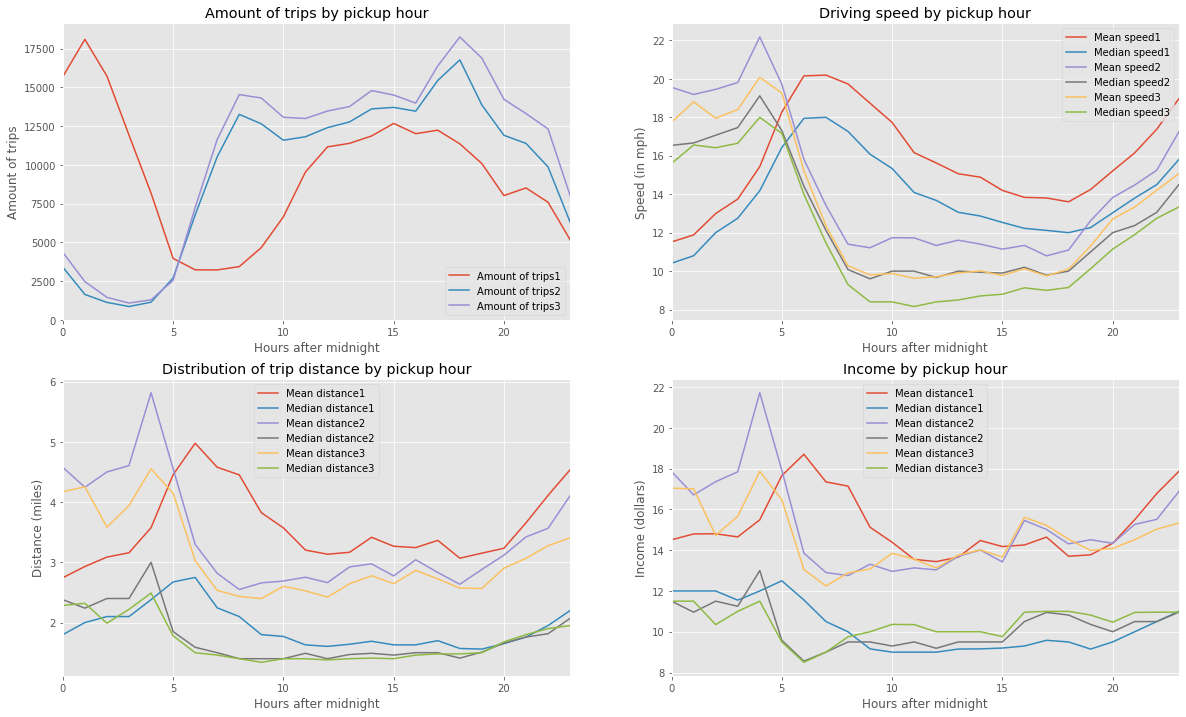

In [4]:
#Analysis: Amount of pickups
fig, ax = plt.subplots(2,2,figsize=(20,12)) # prepare fig to plot mean and median values

ax = plt.subplot(2, 2, 3)
# use a pivot table to aggregate Trip_distance by hour
table1 = taxi_rides.pivot_table(index=['Pickup_day','Pickup_hour'], values='trip_distance',aggfunc=('mean','median')).reset_index()
# rename columns
table1.columns = ['Day','Hour','Mean distance1','Median distance1']
table_day1 = table1[table1['Day']==1].set_index('Hour')
table_day1[['Mean distance1','Median distance1']].plot(ax=ax)
table1.columns = ['Day','Hour','Mean distance2','Median distance2']
table_day2 = table1[table1['Day']==2].set_index('Hour')
table_day2[['Mean distance2','Median distance2']].plot(ax=ax)
table1.columns = ['Day','Hour','Mean distance3','Median distance3']
table_day3 = table1[table1['Day']==3].set_index('Hour')
table_day3[['Mean distance3','Median distance3']].plot(ax=ax)
plt.ylabel('Distance (miles)')
plt.xlabel('Hours after midnight')
plt.title('Distribution of trip distance by pickup hour')
plt.xlim([0,23])

ax = plt.subplot(2, 2, 4)
# use a pivot table to aggregate income by hour
table2 = taxi_rides.pivot_table(index=['Pickup_day','Pickup_hour'], values='income',aggfunc=('mean','median')).reset_index()
# rename columns
table2.columns = ['Day','Hour','Mean distance1','Median distance1']
table_day1 = table2[table2['Day']==1].set_index('Hour')
table_day1[['Mean distance1','Median distance1']].plot(ax=ax)
table2.columns = ['Day','Hour','Mean distance2','Median distance2']
table_day2 = table2[table2['Day']==2].set_index('Hour')
table_day2[['Mean distance2','Median distance2']].plot(ax=ax)
table2.columns = ['Day','Hour','Mean distance3','Median distance3']
table_day3 = table2[table2['Day']==3].set_index('Hour')
table_day3[['Mean distance3','Median distance3']].plot(ax=ax)
plt.ylabel('Income (dollars)')
plt.xlabel('Hours after midnight')
plt.title('Income by pickup hour')
plt.xlim([0,23])

ax = plt.subplot(2, 2, 1)
# use a pivot table to aggregate amount of trips by hour
table3 = taxi_rides.pivot_table(index=['Pickup_day','Pickup_hour'], values='income',aggfunc=('count')).reset_index()
# rename columns
table3.columns = ['Day','Hour','Amount of trips1']
table_day1 = table3[table3['Day']==1].set_index('Hour')
table_day1[['Amount of trips1']].plot(ax=ax)
table3.columns = ['Day','Hour','Amount of trips2']
table_day2 = table3[table3['Day']==2].set_index('Hour')
table_day2[['Amount of trips2']].plot(ax=ax)
table3.columns = ['Day','Hour','Amount of trips3']
table_day3 = table3[table3['Day']==3].set_index('Hour')
table_day3[['Amount of trips3']].plot(ax=ax)
plt.ylabel('Amount of trips')
plt.xlabel('Hours after midnight')
plt.title('Amount of trips by pickup hour')
plt.xlim([0,23])

ax = plt.subplot(2, 2, 2)
# use a pivot table to aggregate speed by hour
table4 = taxi_rides.pivot_table(index=['Pickup_day','Pickup_hour'], values='speed',aggfunc=('mean','median')).reset_index()
# rename columns
table4.columns = ['Day','Hour','Mean speed1','Median speed1']
table_day1 = table4[table4['Day']==1].set_index('Hour')
table_day1[['Mean speed1','Median speed1']].plot(ax=ax)
table4.columns = ['Day','Hour','Mean speed2','Median speed2']
table_day2 = table4[table4['Day']==2].set_index('Hour')
table_day2[['Mean speed2','Median speed2']].plot(ax=ax)
table4.columns = ['Day','Hour','Mean speed3','Median speed3']
table_day3 = table4[table4['Day']==3].set_index('Hour')
table_day3[['Mean speed3','Median speed3']].plot(ax=ax)
plt.ylabel('Speed (in mph)')
plt.xlabel('Hours after midnight')
plt.title('Driving speed by pickup hour')
plt.xlim([0,23])

plt.show()


Text(0, 0.5, 'Frequency')

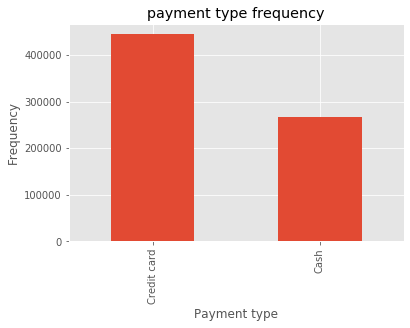

In [5]:
#tip rate analysis we only do with credit card payments because cash tips are not registered
plt = taxi_rides['payment_type'].value_counts().plot(kind='bar',title='payment type frequency')
plt.set_xlabel("Payment type")
plt.set_ylabel("Frequency")

In [6]:
#we only keep the rides payed for with a credit card
taxi_rides = taxi_rides[taxi_rides['payment_type']=='Credit card']

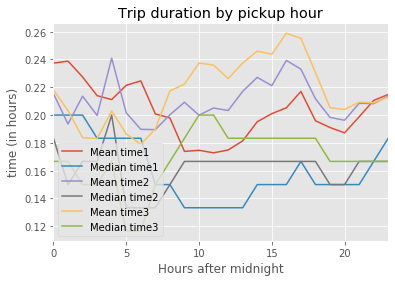

In [7]:
#Extra plot without real insight
import matplotlib.pyplot as plt
fig, ax=plt.subplots(1,1)

ax = plt.subplot(1, 1, 1)
table3 = taxi_rides.pivot_table(index=['Pickup_day','Pickup_hour'], values='trip_time',aggfunc=('mean','median')).reset_index()
# rename columns
table3.columns = ['Day','Hour','Mean time1','Median time1']
table_day1 = table3[table3['Day']==1].set_index('Hour')
table_day1[['Mean time1','Median time1']].plot(ax=ax)
table3.columns = ['Day','Hour','Mean time2','Median time2']
table_day2 = table3[table3['Day']==2].set_index('Hour')
table_day2[['Mean time2','Median time2']].plot(ax=ax)
table3.columns = ['Day','Hour','Mean time3','Median time3']
table_day3 = table3[table3['Day']==3].set_index('Hour')
table_day3[['Mean time3','Median time3']].plot(ax=ax)
plt.ylabel('time (in hours)')
plt.xlabel('Hours after midnight')
plt.title('Trip duration by pickup hour')
#plt.xticks(np.arange(0,30,6)+0.35,range(0,30,6))
plt.xlim([0,23])

plt.show()


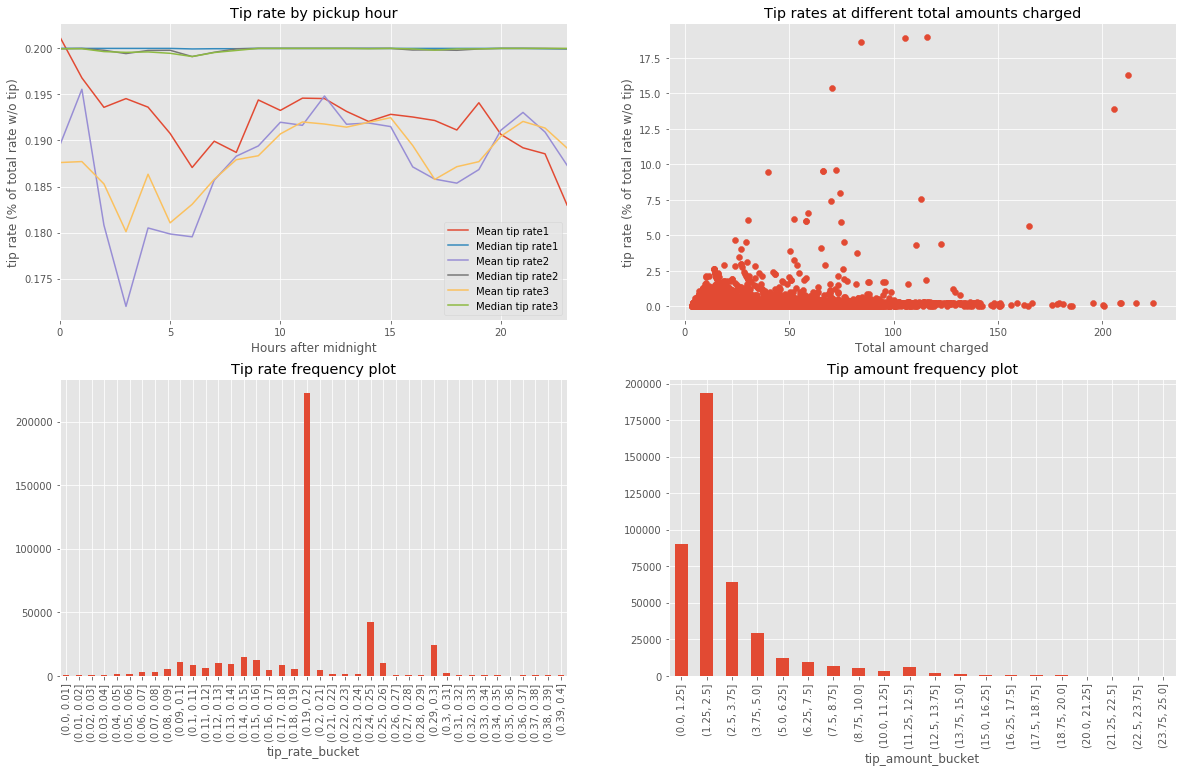

In [8]:
#Analysis: tip rate
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(20,12)) 

ax = plt.subplot(2, 2, 1)
table3 = taxi_rides.pivot_table(index=['Pickup_day','Pickup_hour'], values='tip_rate',aggfunc=('mean','median')).reset_index()
# rename columns
table3.columns = ['Day','Hour','Mean tip rate1','Median tip rate1']
table_day1 = table3[table3['Day']==1].set_index('Hour')
table_day1[['Mean tip rate1','Median tip rate1']].plot(ax=ax)
table3.columns = ['Day','Hour','Mean tip rate2','Median tip rate2']
table_day2 = table3[table3['Day']==2].set_index('Hour')
table_day2[['Mean tip rate2','Median tip rate2']].plot(ax=ax)
table3.columns = ['Day','Hour','Mean tip rate3','Median tip rate3']
table_day3 = table3[table3['Day']==3].set_index('Hour')
table_day3[['Mean tip rate3','Median tip rate3']].plot(ax=ax)
plt.ylabel('tip rate (% of total rate w/o tip)')
plt.xlabel('Hours after midnight')
plt.title('Tip rate by pickup hour')
plt.xlim([0,23])

ax = plt.subplot(2, 2, 2)
plt.scatter(taxi_rides['total_amount'], taxi_rides['tip_rate'])
plt.title('Tip rates at different total amounts charged')
plt.ylabel('tip rate (% of total rate w/o tip)')
plt.xlabel('Total amount charged')

ax = plt.subplot(2, 2, 3)
bucket_array = np.linspace(0, 0.4, 41)
taxi_rides['tip_rate_bucket'] = pd.cut(taxi_rides['tip_rate'], bucket_array)
a = taxi_rides.groupby('tip_rate_bucket').size()
a.plot(kind='bar',title='Tip rate frequency plot')

ax = plt.subplot(2, 2, 4)
bucket_array = np.linspace(0, 25, 21)
taxi_rides['tip_amount_bucket'] = pd.cut(taxi_rides['tip_amount'], bucket_array)
a = taxi_rides.groupby('tip_amount_bucket').size()
a.plot(kind='bar',title='Tip amount frequency plot')

plt.show()

In [9]:
taxi_rides['tip_rate'].describe()

count    444642.000000
mean          0.190330
std           0.112015
min           0.000000
25%           0.165049
50%           0.200000
75%           0.200000
max          18.965517
Name: tip_rate, dtype: float64

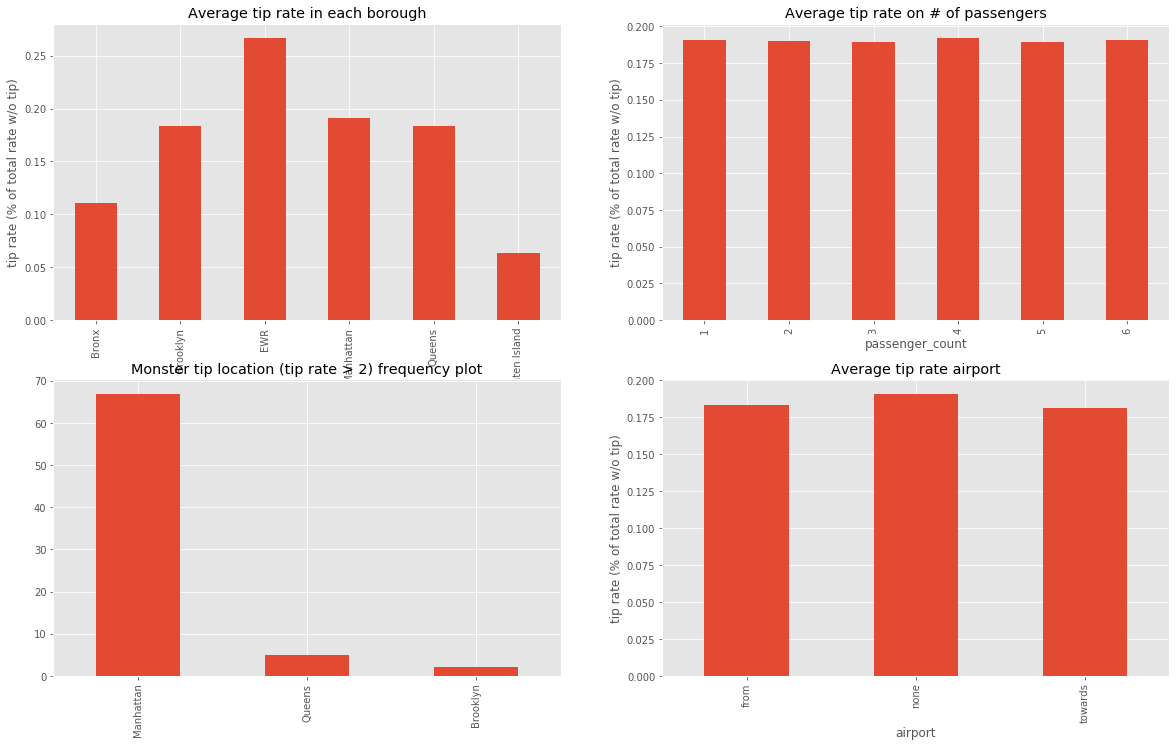

In [10]:
#Analysis: Other features
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(20,12)) 

ax = plt.subplot(2, 2, 1)
plot = taxi_rides.groupby(['PUborough']).mean()['tip_rate'].plot(kind='bar',title='Average tip rate in each borough')
plot.set_ylabel("tip rate (% of total rate w/o tip)")

ax = plt.subplot(2, 2, 2)
plot = taxi_rides.groupby(['passenger_count']).mean()['tip_rate'].plot(kind='bar',title='Average tip rate on # of passengers')
plot.set_ylabel("tip rate (% of total rate w/o tip)")

import matplotlib.pyplot as plt
ax = plt.subplot(2, 2, 4)
plot = taxi_rides.groupby(['airport']).mean()['tip_rate'].plot(kind='bar',title='Average tip rate airport')
plot.set_ylabel("tip rate (% of total rate w/o tip)")

#Monster tips
monster_tips = taxi_rides[taxi_rides['tip_rate']>2]

ax = plt.subplot(2, 2, 3)
plot = monster_tips['PUborough'].value_counts().plot(kind='bar',title='Monster tip location (tip rate > 2) frequency plot')


plt.show()

(0, 23)

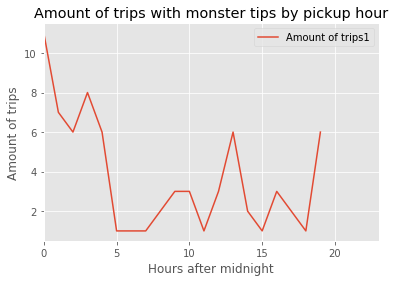

In [11]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(1,1)

ax = plt.subplot(1, 1, 1)
# use a pivot table to aggregate amount of trips by hour
table3 = monster_tips.pivot_table(index=['Pickup_hour'], values='income',aggfunc=('count')).reset_index()
# rename columns
table3.columns = ['Hour','Amount of trips1']
table3[['Amount of trips1']].plot(ax=ax)
plt.ylabel('Amount of trips')
plt.xlabel('Hours after midnight')
plt.title('Amount of trips with monster tips by pickup hour')
#plt.xticks(np.arange(0,30,6)+0.35,range(0,30,6))
plt.xlim([0,23])

Text(0, 0.5, 'total charge')

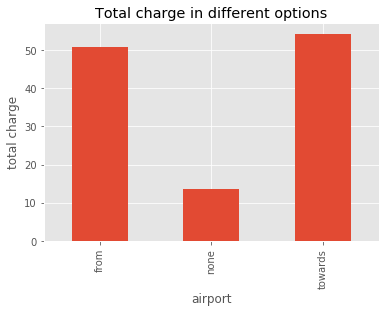

In [12]:
plot = taxi_rides.groupby(['airport']).mean()['total_amount'].plot(kind='bar',title='Total charge in different options')
plot.set_ylabel("total charge")